In [36]:
from pathlib import Path 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from collections import OrderedDict
import sys
import os
import seaborn as sns
import researchpy as rp
import statsmodels.formula.api as smf
import scipy.stats as stats
import ipympl

#sys.path.append('/Users/alina/Desktop/MIT/code/ADHD/MTA/helper')
from helper import rr, prep, var_dict

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
data_root = '/Volumes/Samsung_T5/MIT/mta'
data_derived = '/Volumes/Samsung_T5/MIT/mta/output/derived_data'
os.listdir(data_derived)

['snap_baseline_p_t.csv',
 'snap_14_p_t.csv',
 'snap_24_p_t.csv',
 'snap_36_p_t.csv',
 'ssrs_baseline_p_t.csv',
 'ssrs_14_p_t.csv',
 'ssrs_24_p_t.csv',
 'ssrs_36_p_t.csv',
 'masc_c_treat.csv',
 'pc_p_treat.csv',
 'wechsler_c_treat.csv',
 'snap_p_t.csv',
 'ssrs_p_t.csv',
 'masc_baseline.csv',
 'masc_14.csv',
 'masc_24.csv',
 'masc_36.csv',
 'pc_p_baseline.csv',
 'pc_p_14.csv',
 'pc_p_24.csv',
 'pc_p_36.csv',
 'wechsler_baseline.csv',
 'wechsler_14.csv',
 'wechsler_24.csv',
 'wechsler_36.csv',
 'masc_c.csv',
 'pc_p.csv',
 'wechsler_c.csv',
 'treatment_groups.csv',
 'comorb.csv',
 'prev_med.csv',
 'assist.csv',
 'accept.csv']

In [38]:
snap = pd.read_csv(Path(data_derived, 'snap_p_t.csv'))
ssrs = pd.read_csv(Path(data_derived, 'ssrs_p_t.csv'))
masc = pd.read_csv(Path(data_derived, 'masc_c.csv'))
pc = pd.read_csv(Path(data_derived, 'pc_p.csv'))
wechsler = pd.read_csv(Path(data_derived, 'wechsler_c.csv'))
trt_name = pd.read_csv(Path(data_derived, 'treatment_groups.csv'))
qsts = {'snap' : snap, 'ssrs': ssrs, 'masc': masc, 'pc': pc, 'wechsler' : wechsler}

In [39]:
comorb = pd.read_csv(Path(data_derived, 'comorb.csv')) # comorbid ODD/CD anxiety
prev_med = pd.read_csv(Path(data_derived, 'prev_med.csv')) #'prevous stimulant medictaion exposure
assist = pd.read_csv(Path(data_derived, 'assist.csv')) #reciept of public assistance 
accept = pd.read_csv(Path(data_derived, 'accept.csv')) #initial acceptance of treatment arm
medi = {'comorb': comorb, 'prev_med': prev_med, 'assist': assist, 'accept': accept}

In [40]:
snap_p = prep.get_masked_df(snap, 'p_t_bool', 'eq', 1)
snap_t = prep.get_masked_df(snap, 'p_t_bool', 'eq', 2)

ssrs_p = prep.get_masked_df(ssrs, 'p_t_bool', 'eq', 1)
ssrs_t = prep.get_masked_df(ssrs, 'p_t_bool', 'eq', 2)

In [41]:
snap_p_baseline, snap_p_14, snap_p_24, snap_p_36 = prep.split_times(snap_p)
snap_t_baseline, snap_t_14, snap_t_24, snap_t_36 = prep.split_times(snap_t)

### Outcomes 

In [42]:
all_predictors = [ 'treat',  'time', 'site']

snap_outcome = ['snainatx', 'snahypax', 'snaimpux', 'snaoddx']
snap_var = ['snap_inatt', 'snap_hyp', 'snap_imp', 'snap_odd']

ssrs_outcome = ['ssptossx','sspintx' ]
ssrs_var = ['ssrs_ss', 'ssrs_int']

masc_outcome =  ['masc_masctotalt']
masc_var = ['masc_tot']

wechsler_outcome = ['w1readb', 'w2math', 'w3spell']
wechsler_var = ['w_read', 'w_math', 'w_spell']

outcome_all = np.concatenate((snap_outcome, ssrs_outcome, masc_outcome, wechsler_outcome))
vars_all = np.concatenate((snap_var, ssrs_var, masc_var, wechsler_var))

dict_outcome_var = dict(zip(vars_all, outcome_all))
dict_outcome_var


{'snap_inatt': 'snainatx',
 'snap_hyp': 'snahypax',
 'snap_imp': 'snaimpux',
 'snap_odd': 'snaoddx',
 'ssrs_ss': 'ssptossx',
 'ssrs_int': 'sspintx',
 'masc_tot': 'masc_masctotalt',
 'w_read': 'w1readb',
 'w_math': 'w2math',
 'w_spell': 'w3spell'}

In [43]:
baseline_vars = var_dict.get_baseline_vars()
baseline_vars

['src_subject_id',
 'interview_date',
 'interview_age',
 'sex',
 'site',
 'days_baseline',
 'relationship']

### mediators 

In [44]:
pred_vars = []
for med in medi.values():
    for col in med.columns:
        if col not in baseline_vars and col not in pred_vars and col != 'Unnamed: 0':
            pred_vars.append(col)

In [45]:
pred_vars

['cdorodd',
 'pso',
 'psoi',
 'pag',
 'pagi',
 'pga',
 'pgai',
 'psa',
 'psai',
 'trtname',
 'hi_24',
 'demo61',
 'd2dresp']

In [46]:
snap

,src_subject_id,interview_date,interview_age,sex,site,days_baseline,relationship,snainatx,snainatt,snahypax,snahypat,snaimpux,snaimput,snaoddx,snaoddt,p_t_bool,log_days_baseline
0,P1434,12/26/2004,203,M,2,3568,1,1.78,16.0,1.50,9.0,1.33,4.0,2.13,17.0,1,8.180041
1,P1435,09/03/1995,77,F,6,-206,1,3.00,27.0,3.00,18.0,3.00,9.0,2.75,22.0,1,0.000000
2,P1435,07/21/1996,88,F,6,116,1,1.89,17.0,2.83,17.0,3.00,9.0,2.38,19.0,1,4.762174
3,P1435,10/02/1996,90,F,6,189,1,1.78,16.0,1.83,11.0,1.67,5.0,2.38,19.0,1,5.247024
4,P1435,04/30/1997,97,F,6,399,1,0.89,8.0,1.00,6.0,0.67,2.0,1.75,14.0,1,5.991465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9652,P1868,11/18/2002,154,F,1,1753,14,0.22,2.0,0.00,0.0,0.00,0.0,0.00,0.0,2,7.469654
9653,P1868,11/18/2002,154,F,1,1753,14,0.22,2.0,0.17,1.0,0.67,2.0,0.13,1.0,2,7.469654
9654,P1868,10/25/2004,178,F,1,2460,14,0.11,1.0,0.33,2.0,0.33,1.0,0.13,1.0,2,7.808323
9655,P1868,11/02/2004,178,F,1,2468,14,1.00,9.0,1.50,9.0,1.00,3.0,0.50,4.0,2,7.811568


In [48]:
from scipy.stats import zscore

In [49]:
zscore = zscore(np.array(snap['snahypax']))

In [53]:
snap['snahypax']

0       1.50
1       3.00
2       2.83
3       1.83
4       1.00
        ... 
9652    0.00
9653    0.17
9654    0.33
9655    1.50
9656    0.67
Name: snahypax, Length: 9657, dtype: float64

In [63]:
data = snap['snaoddx']


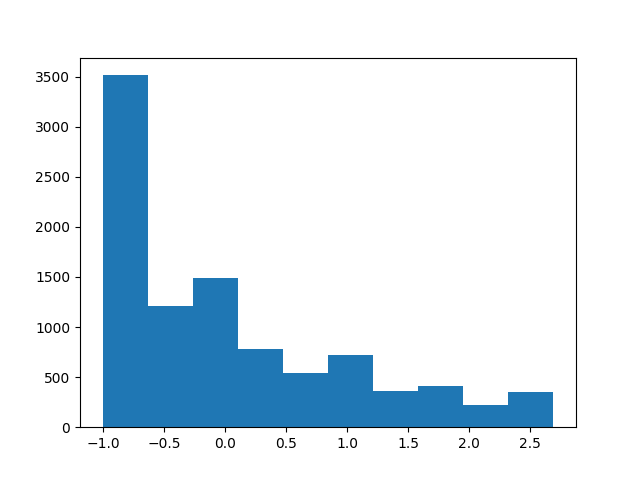

In [64]:
mean = data.mean()
std = data.std()
zscore = (data - mean ) / std
zscore
plt.hist(zscore)
plt.show()